In [ ]:
import uproot
import glob
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory
from coffea.nanoevents import NanoEventsFactory, BaseSchema, NanoAODSchema
from coffea.nanoevents.methods import candidate
from coffea.lumi_tools import LumiMask
from coffea.lookup_tools import extractor
from coffea.util import save

In [ ]:
import awkward as ak
from coffea import lookup_tools

In [ ]:
#dir_prefix='root://cms-xrd-global.cern.ch/'
dir_prefix='root://cmsxrootd.fnal.gov/'

In [ ]:
root='/store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/230000/00EA9563-5449-D24E-9566-98AE8E2A61AE.root'


In [ ]:
print(root)

In [ ]:
data='/eos/cms/store/data/Run2018A/EGamma/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v1/270000/00B7FFB1-3455-C941-AE3B-CF7085966A41.root'

In [ ]:
events=NanoEventsFactory.from_root(data, schemaclass=NanoAODSchema).events()

In [ ]:
ext = extractor()

In [ ]:
events = events[events.Flag.goodVertices & events.Flag.globalSuperTightHalo2016Filter & events.Flag.HBHENoiseFilter & events.Flag.HBHENoiseIsoFilter & events.Flag.EcalDeadCellTriggerPrimitiveFilter & events.Flag.BadPFMuonFilter & events.Flag.BadPFMuonDzFilter & events.Flag.eeBadScFilter & events.Flag.ecalBadCalibFilter]
events = events[(ak.num(events.Jet) > 1) & ((ak.num(events.Muon) > 1) | (ak.num(events.Electron) > 1))]


In [ ]:
tight_muons = events.Muon[events.Muon.tightId & (events.Muon.pfRelIso04_all < 0.15) & (events.Muon.pt > 10) & (abs(events.Muon.eta) < 2.4)]
tight_electrons = events.Electron[(events.Electron.pt > 10) & (events.Electron.mvaFall17V2Iso_WP80) & (abs(events.Electron.eta + events.Electron.deltaEtaSC) < 2.5) & (((abs(events.Electron.dz) < 0.1) & (abs(events.Electron.dxy) < 0.05) & (abs(events.Electron.eta + events.Electron.deltaEtaSC) < 1.479)) | ((abs(events.Electron.dz) < 0.2) & (abs(events.Electron.dxy) < 0.1) & (abs(events.Electron.eta + events.Electron.deltaEtaSC) > 1.479)))]


In [ ]:
corrected_jets = events.Jet
jet_pt = events.Jet.pt
jet_pt_jesup = events.Jet.pt
jet_pt_jesdn = events.Jet.pt

In [ ]:
tight_jets=corrected_jets[(corrected_jets.jetId==6) & (corrected_jets.pt>30) & (abs(corrected_jets.eta)<4.7)]

In [ ]:
tight_jets = tight_jets[(ak.num(tight_jets)>1)]
tight_muons= tight_muons[(ak.num(tight_jets)>1)]
tight_electrons= tight_electrons[(ak.num(tight_jets)>1)]
basejet_cut = ( (tight_jets[:,0]+tight_jets[:,1]).mass > 500 )
print('length: ',len(tight_jets),' ',len(tight_muons),len(tight_electrons))

In [ ]:
CRmm = ( (ak.num(tight_muons)>1) & (ak.num(tight_jets)>1) )
sel1_muons=tight_muons[CRmm & basejet_cut]
sel1_events=events[CRmm & basejet_cut]
sel1_jets=tight_jets[CRmm & basejet_cut]
print(len(sel1_events))

In [ ]:
sel1_muons.pt

In [ ]:
CRmm_cut = ( (abs((sel1_muons[:,0]+sel1_muons[:,1]).mass-91)<15) & ((sel1_muons[:,0]+sel1_muons[:,1]).pt>70) )
sel1_muons=sel1_muons[CRmm_cut]
sel1_jets=sel1_jets[CRmm_cut]
sel1_events=sel1_events[CRmm_cut]
print(len(sel1_jets))

In [ ]:
(sel1_muons[:,0]+sel1_muons[:,1]).mass

In [ ]:
CRee = ( (ak.num(tight_electrons)>1) & (ak.num(tight_jets)>1) )
sel2_eles  = tight_electrons[CRee & basejet_cut]
sel2_events=events[CRee & basejet_cut]
sel2_jets  =tight_jets[CRee & basejet_cut]
print('length: ',len(sel2_jets))

In [ ]:
CRee_cut= ( (abs((sel2_eles[:,0]+sel2_eles[:,1]).mass-91)<15) & ((sel2_eles[:,0]+sel2_eles[:,1]).pt>70) )
sel2_eles = sel2_eles[CRee_cut]
sel2_jets = sel2_jets[CRee_cut]
sel2_events = sel2_events[CRee_cut]
print('length: ',len(sel2_jets))

In [ ]:
sel1_muons.pdgId

In [ ]:
sel2_eles.pdgId[0,0]

In [ ]:
(sel2_eles[:,0]+sel2_eles[:,1]).mass

In [ ]:
ak.count(tight_muons.pt,axis=1)

In [ ]:
ak.num(tight_muons)

In [ ]:
SR_events=events[(ak.num(events.Photon)>0)]

In [ ]:
SR_events.Photon.pt

In [ ]:
tight_photons=SR_events.Photon[(ak.num(events.Photon)>0) & (events.Photon.pt>70) & (events.Photon.cutBased==3) & (events.Photon.pixelSeed==0) ]

In [ ]:
events.Photon.vidNestedWPBitmap

In [ ]:
basecut_mu=( (ak.num(tight_muons)>1) & (ak.num(tight_jets)>1))

In [ ]:
tight_muons=tight_muons[basecut_mu]

In [ ]:
tight_jets=tight_jets[basecut_mu]
events_muon=events[basecut_mu]

In [ ]:
tight_jets.pt

In [ ]:
cut1=( ((tight_jets[:,0]+tight_jets[:,1]).mass > 500))
cut2=( (abs((tight_muons[:,0]+tight_muons[:,1]).mass-91)<15) & ((tight_muons[:,0]+tight_muons[:,1]).pt>200) )

In [ ]:
cut3=( (abs((tight_muons[:,0]+tight_muons[:,1]).mass-91)<15) & ((tight_muons[:,0]+tight_muons[:,1]).pt>75) & ((tight_muons[:,0]+tight_muons[:,1]).pt<200))


In [ ]:
sel12_events=events_muon[cut1 & cut2]

In [ ]:
sel12_muons=tight_muons[cut1 & cut2]

In [ ]:
sel12_jets=tight_jets[cut1 & cut2]

In [ ]:
zmm=sel12_muons[:,0]+sel12_muons[:,1]

In [ ]:
jj=sel12_jets[:,0]+sel12_jets[:,1]

In [ ]:
sel12_muons.pt[13]

In [ ]:
sel12_events.Muon[13]

In [ ]:
zmm1=sel12_events.Muon[:,0]+sel12_events.Muon[:,1]

In [ ]:
ak.num(sel12_events,axis=0)

In [ ]:
len(sel12_events)

In [ ]:
plt.hist(zmm.mass,label = "Z mm mass",bins=np.linspace(50,120,50),histtype="step")
plt.hist(zmm1.mass,label = "test",bins=np.linspace(50,120,50),histtype="step")
plt.legend()

In [ ]:
print(zmm.mass,'\n',len(zmm.mass))

In [ ]:
print(zmm1.mass[13],'\n',zmm.mass[13])

In [ ]:
for i in range(0,len(zmm.mass)):
    if (zmm.mass[i]-zmm1.mass[i])!=0:
        print('difference',i,'\t',zmm.mass[i],'\t',zmm1.mass[i])

In [ ]:
from coffea.jetmet_tools import FactorizedJetCorrector, JetCorrectionUncertainty
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory
import awkward as ak
import numpy as np
from coffea.lookup_tools.jec_uncertainty_lookup import jec_uncertainty_lookup

In [ ]:
ext.add_weight_sets([
    "* * /eos/user/y/yian/SWAN_projects/ajj_bdt/JESR_files/Summer19UL18_V5_MC_L1FastJet_AK4PFchs.txt",
    "* * /eos/user/y/yian/SWAN_projects/ajj_bdt/JESR_files/Summer19UL18_V5_MC_L2Relative_AK4PFchs.txt",
    "* * /eos/user/y/yian/SWAN_projects/ajj_bdt/JESR_files/Summer19UL18_V5_MC_L3Absolute_AK4PFchs.txt",
    "* * /eos/user/y/yian/SWAN_projects/ajj_bdt/JESR_files/Summer19UL18_V5_MC_L2L3Residual_AK4PFchs.txt",
    "* * /eos/user/y/yian/SWAN_projects/ajj_bdt/JESR_files/Summer19UL18_V5_MC_Uncertainty_AK4PFchs.junc.txt",
])
ext.finalize()

jec_stack_names = ['Summer19UL18_V5_MC_L1FastJet_AK4PFchs','Summer19UL18_V5_MC_L2Relative_AK4PFchs','Summer19UL18_V5_MC_L3Absolute_AK4PFchs','Summer19UL18_V5_MC_L2L3Residual_AK4PFchs','Summer19UL18_V5_MC_Uncertainty_AK4PFchs']
#jec_stack_names = ['Summer19UL18_V5_MC_L1FastJet_AK4PFchs','Summer19UL18_V5_MC_L2Relative_AK4PFchs','Summer19UL18_V5_MC_L3Absolute_AK4PFchs','Summer19UL18_V5_MC_L2L3Residual_AK4PFchs']


evaluator = ext.make_evaluator()

jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs)

print(dir(evaluator))

In [ ]:
name_map = jec_stack.blank_name_map
name_map['JetPt'] = 'pt'
name_map['JetMass'] = 'mass'
name_map['JetEta'] = 'eta'
name_map['JetA'] = 'area'

jets = events.Jet

jets['pt_raw'] = (1 - jets['rawFactor']) * jets['pt']
jets['mass_raw'] = (1 - jets['rawFactor']) * jets['mass']
jets['pt_gen'] = ak.values_astype(ak.fill_none(jets.matched_gen.pt, 0), np.float32)
jets['rho'] = ak.broadcast_arrays(events.fixedGridRhoFastjetAll, jets.pt)[0]
name_map['ptGenJet'] = 'pt_gen'
name_map['ptRaw'] = 'pt_raw'
name_map['massRaw'] = 'mass_raw'
name_map['Rho'] = 'rho'

In [ ]:
events_cache = events.caches[0]
jet_factory = CorrectedJetsFactory(name_map, jec_stack)
corrected_jets = jet_factory.build(jets, lazy_cache=events_cache)     

In [ ]:
print('starting columns:', set(ak.fields(jets)))
print('new columns:', set(ak.fields(corrected_jets)) - set(ak.fields(jets)))

In [ ]:
jet_pt = corrected_jets.pt
jet_pt_jesup = corrected_jets.JES_jes.up.pt

In [2]:
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import uproot
import argparse
import hist

In [5]:
ftest = load('/eos/user/y/yian/AJJ_analysis/outfile_test.coffea')

In [6]:
print(ftest)

{'sel1_boson_pt': Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9557.51, variance=23232.6) (WeightedSum(value=9611.61, variance=23353.8) with flow), 'sel1_boson_mass': Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(40, 70, 110, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9611.61, variance=23353.8), 'sel1_mjj': Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 500, 2000, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9495.92, variance=22996.8) (WeightedSum(value=9611.61, variance=23353.8) with flow), 'sel2_boson_pt': Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'),
  storage=Weigh

In [7]:
ftest.items()

dict_items([('sel1_boson_pt', Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9557.51, variance=23232.6) (WeightedSum(value=9611.61, variance=23353.8) with flow)), ('sel1_boson_mass', Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(40, 70, 110, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9611.61, variance=23353.8)), ('sel1_mjj', Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 500, 2000, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9495.92, variance=22996.8) (WeightedSum(value=9611.61, variance=23353.8) with flow)), ('sel2_boson_pt', Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f77600a8f10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

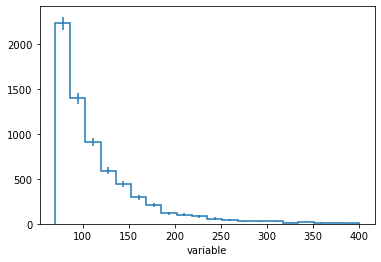

In [8]:
fig, ax = plt.subplots()
ftest['sel2_boson_pt'].plot1d(ax=ax, overlay='dataset')
#ax.set_yscale('log')

In [9]:
a=ftest['sel2_boson_pt'].values()

In [13]:
a

array([[2230.92642581, 1394.65467906,  911.10894954,  591.56819451,
         444.52968782,  293.98365998,  204.58090967,  114.97221017,
          99.99174458,   83.86678159,   57.64776891,   40.04451066,
          26.05385536,   26.47379041,   26.02465338,   13.69601601,
          20.94784689,   11.40558743,   11.47992849,    5.83856374]])

In [12]:
a[:,1]

array([1394.65467906])

In [14]:
ftest['sel2_boson_mass'].values()

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  26.12348831,  29.68631011,
         37.37846297,  55.48905909,  58.94258261,  67.83413774,
         75.28267807, 115.04723042, 161.56723088, 225.73316985,
        256.95741719, 410.36928809, 522.89055979, 750.55857182,
        899.16249591, 781.11561221, 731.54494363, 418.52382833,
        319.74602795, 199.2093032 , 128.77106172, 100.86370945,
         61.37798911,  40.05990696,  32.786542  ,  25.91077924,
         33.47601968,  25.37405312,  29.76656824,  20.22797424,
          0.        ,   0.        ,   0.        ,   0.        ]])

In [15]:
scaled = {}
for name, h in ftest.items():
    if isinstance(h, hist.Hist):
        print(name,h)
        scaled[name] = h.copy()

sel1_boson_pt Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9557.51, variance=23232.6) (WeightedSum(value=9611.61, variance=23353.8) with flow)
sel1_boson_mass Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(40, 70, 110, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9611.61, variance=23353.8)
sel1_mjj Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 500, 2000, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9495.92, variance=22996.8) (WeightedSum(value=9611.61, variance=23353.8) with flow)
sel2_boson_pt Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'),
  storage=Weight()) # Sum: Weig

In [36]:
scaled['sel1_boson_mass'][0,:]

Hist(Regular(40, 70, 110, name='variable', label='variable'), storage=Weight()) # Sum: WeightedSum(value=9611.61, variance=23353.8)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f774de48700>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

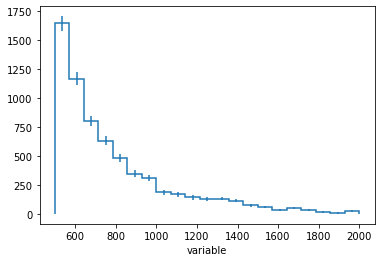

In [17]:
fig, ax = plt.subplots()
ftest['sel2_mjj'].plot1d(ax=ax, overlay='dataset')

In [18]:
scaled = {}
for name, h in ftest.items():
    if isinstance(h, hist.Hist):
        scaled[name] = h.copy()
        print(name,h)

sel1_boson_pt Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9557.51, variance=23232.6) (WeightedSum(value=9611.61, variance=23353.8) with flow)
sel1_boson_mass Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(40, 70, 110, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9611.61, variance=23353.8)
sel1_mjj Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 500, 2000, name='variable', label='variable'),
  storage=Weight()) # Sum: WeightedSum(value=9495.92, variance=22996.8) (WeightedSum(value=9611.61, variance=23353.8) with flow)
sel2_boson_pt Hist(
  StrCategory(['dyjets'], growth=True, name='dataset', label='Primary dataset'),
  Regular(20, 70, 400, name='variable', label='variable'),
  storage=Weight()) # Sum: Weig

In [19]:
ftest['sumsign']

defaultdict(float, {'dyjets': 131550065.0})

In [20]:
scaled['sel1_boson_pt'].values()

array([[3362.19866669, 2214.23031688, 1216.46060812,  791.92017692,
         571.04384756,  366.43748397,  254.0075866 ,  196.84506786,
         160.60586745,   92.90988469,   58.60014677,   57.87422711,
          61.58840179,   32.59587353,   30.22787899,   22.05250478,
          20.98050392,   18.05073947,   19.01546204,    9.86390227]])

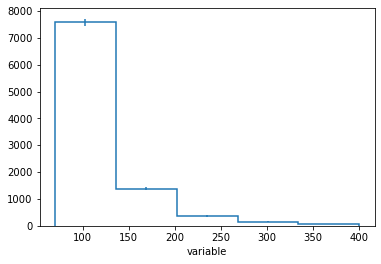

In [21]:
fig, ax = plt.subplots()
h=scaled['sel1_boson_pt'].copy()
h[:, ::hist.rebin(4)].plot1d(ax=ax, overlay='dataset');

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f774dd0e970>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

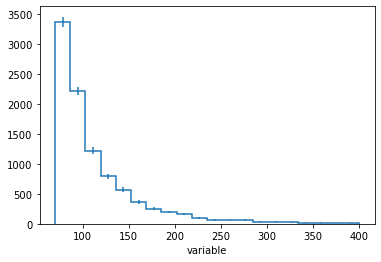

In [22]:
fig, ax = plt.subplots()
ftest['sel1_boson_pt'].plot1d(ax=ax, overlay='dataset')

In [23]:
h.counts()

array([[3362.19866669, 2214.23031688, 1216.46060812,  791.92017692,
         571.04384756,  366.43748397,  254.0075866 ,  196.84506786,
         160.60586745,   92.90988469,   58.60014677,   57.87422711,
          61.58840179,   32.59587353,   30.22787899,   22.05250478,
          20.98050392,   18.05073947,   19.01546204,    9.86390227]])

In [26]:
ftest['nevents']

defaultdict(float, {'dyjets': 195477687.0, 'egamma': 0.0})